<a href="https://colab.research.google.com/github/MableMatovu/MableMatovu/blob/main/Energy_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',None)
import matplotlib.pyplot as plt
import plotly.express as px


#Import dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project/per-capita-electricity-source-stacked.csv")

In [ ]:
df_generation = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project/per-capita-electricity-source-stacked.csv")
df_consumption = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project/per-capita-electricity-source-stacked.csv")

In [ ]:
df_generation

,Entity,Code,Year,Coal_percapita_KWH,Gas_percapita_KWH,Oil_percapita_KWH,Nuclear_percapita_KWH,Hydro_percapita_KWH,Wind_percapita_KWH,Solar_percapita_KWH,Bioenergy_percapita_KWH,Other_renewables_percapita_KWH
0,Afghanistan,AFG,2000,0.00000,0.0,8.187080,0.0,15.862469,0.0,0.000000,0.000000,0.0
1,Afghanistan,AFG,2001,0.00000,0.0,4.571165,0.0,25.395363,0.0,0.000000,0.000000,0.0
2,Afghanistan,AFG,2002,0.00000,0.0,6.190400,0.0,26.666340,0.0,0.000000,0.000000,0.0
3,Afghanistan,AFG,2003,0.00000,0.0,13.689474,0.0,27.820543,0.0,0.000000,0.000000,0.0
4,Afghanistan,AFG,2004,0.00000,0.0,14.010625,0.0,23.775604,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5793,Zimbabwe,ZWE,2017,204.73048,0.0,2.033746,0.0,269.132480,0.0,0.677916,21.693296,0.0
5794,Zimbabwe,ZWE,2018,245.14705,0.0,2.657420,0.0,335.499360,0.0,1.328710,25.909850,0.0
5795,Zimbabwe,ZWE,2019,235.75987,0.0,2.605082,0.0,271.579740,0.0,1.953811,24.748274,0.0
5796,Zimbabwe,ZWE,2020,214.42708,0.0,2.552703,0.0,243.144970,0.0,1.914527,22.336153,0.0


# Check Data consistency

## Head

In [ ]:
df.head(3)

,Entity,Code,Year,Coal_percapita_KWH,Gas_percapita_KWH,Oil_percapita_KWH,Nuclear_percapita_KWH,Hydro_percapita_KWH,Wind_percapita_KWH,Solar_percapita_KWH,Bioenergy_percapita_KWH,Other_renewables_percapita_KWH
0,Afghanistan,AFG,2000,0.0,0.0,8.187080,0.0,15.862469,0.0,0.0,0.0,0.0
1,Afghanistan,AFG,2001,0.0,0.0,4.571165,0.0,25.395363,0.0,0.0,0.0,0.0
2,Afghanistan,AFG,2002,0.0,0.0,6.190400,0.0,26.666340,0.0,0.0,0.0,0.0


##Describe

In [ ]:
df.describe()

,Year,Coal_percapita_KWH,Gas_percapita_KWH,Oil_percapita_KWH,Nuclear_percapita_KWH,Hydro_percapita_KWH,Wind_percapita_KWH,Solar_percapita_KWH,Bioenergy_percapita_KWH,Other_renewables_percapita_KWH
count,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000
mean,2007.991549,696.706105,850.741326,816.774715,377.484610,929.710639,76.293265,22.943803,57.159177,58.414715
std,8.911605,1347.439612,2130.251109,1761.664507,1058.205482,3261.081404,276.983783,85.497102,188.550411,787.415199
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2002.000000,0.000000,0.000000,33.486879,0.000000,3.716776,0.000000,0.000000,0.000000,0.000000
50%,2009.000000,0.000000,65.661920,156.575190,0.000000,126.619818,0.000000,0.000000,0.000000,0.000000
75%,2015.000000,774.833905,793.788175,550.014375,0.000000,698.704988,9.244158,1.315296,25.385305,0.000000
max,2022.000000,9478.404000,21246.992000,13773.766000,8931.636000,40897.940000,3218.151400,1483.722000,2514.102300,16291.214000


##Info



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5798 entries, 0 to 5797
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Entity                          5798 non-null   object 
 1   Code                            5412 non-null   object 
 2   Year                            5798 non-null   int64  
 3   Coal_percapita_KWH              5798 non-null   float64
 4   Gas_percapita_KWH               5798 non-null   float64
 5   Oil_percapita_KWH               5798 non-null   float64
 6   Nuclear_percapita_KWH           5798 non-null   float64
 7   Hydro_percapita_KWH             5798 non-null   float64
 8   Wind_percapita_KWH              5798 non-null   float64
 9   Solar_percapita_KWH             5798 non-null   float64
 10  Bioenergy_percapita_KWH         5798 non-null   float64
 11  Other_renewables_percapita_KWH  5798 non-null   float64
dtypes: float64(9), int64(1), object(2)

##Shape

In [ ]:
df.shape

(5798, 12)

##Check duplicates

In [ ]:
df.duplicated().sum()

0

In [ ]:
df[["Code","Entity","Year"]].duplicated().sum()

0

##Check null values


In [ ]:
df.isnull().sum()

Entity                              0
Code                              386
Year                                0
Coal_percapita_KWH                  0
Gas_percapita_KWH                   0
Oil_percapita_KWH                   0
Nuclear_percapita_KWH               0
Hydro_percapita_KWH                 0
Wind_percapita_KWH                  0
Solar_percapita_KWH                 0
Bioenergy_percapita_KWH             0
Other_renewables_percapita_KWH      0
dtype: int64

In [ ]:
# Code is blank for continents
df[df["Code"].isna()]["Entity"].value_counts()

Africa                           38
Asia                             38
Europe                           38
European Union (27)              38
High-income countries            38
Lower-middle-income countries    38
North America                    38
South America                    38
Upper-middle-income countries    38
Low-income countries             22
Oceania                          22
Name: Entity, dtype: int64

## no of unique entities / countries

In [ ]:
df["Entity"].nunique(),df["Code"].nunique()

(223, 212)

## min and max year in the dataset

In [ ]:
##found 38 years of data
df["Year"].max(),df["Year"].min()

(2022, 1985)

## find how many years data exists for each country

In [ ]:
df_grouped = df.groupby(["Entity"]).agg(nb_code=("Code","count"),nb_years=("Year","count"),min_year=("Year","min"),max_year=("Year","max")).reset_index()
df_grouped.sort_values(by="nb_years",ascending=False)

,Entity,nb_code,nb_years,min_year,max_year
167,Russia,38,38,1985,2022
58,Egypt,38,38,1985,2022
66,European Union (27),0,38,1985,2022
65,Europe,0,38,1985,2022
203,Turkey,38,38,1985,2022
...,...,...,...,...,...
127,Martinique,12,12,2000,2011
165,Reunion,12,12,2000,2011
72,French Guiana,12,12,2000,2011
188,South Sudan,10,10,2012,2021


In [ ]:
df_grouped[df_grouped["max_year"]<=2022]


,Entity,nb_code,nb_years,min_year,max_year
0,Afghanistan,22,22,2000,2021
1,Africa,0,38,1985,2022
2,Albania,32,32,1990,2021
3,Algeria,22,22,2000,2021
4,American Samoa,22,22,2000,2021
...,...,...,...,...,...
218,Western Sahara,22,22,2000,2021
219,World,38,38,1985,2022
220,Yemen,22,22,2000,2021
221,Zambia,22,22,2000,2021


#Data cleaning

##Change col names

In [ ]:
df=df.rename(columns={"Other_renewables_percapita_KWH":"other_renewables"})
df=df.rename(columns={"Bioenergy_percapita_KWH":"bioenergy"})
df=df.rename(columns={"Solar_percapita_KWH":"solar"})
df=df.rename(columns={"Wind_percapita_KWH":"wind"})
df=df.rename(columns={"Hydro_percapita_KWH":"hydro"})
df=df.rename(columns={"Nuclear_percapita_KWH":"nuclear"})
df=df.rename(columns={"Oil_percapita_KWH":"oil"})
df=df.rename(columns={"Gas_percapita_KWH":"gas"})
df=df.rename(columns={"Coal_percapita_KWH":"coal"})


#Data enrichment

## transform the data format - Original dataset melted

In [ ]:
list_id_vars = ["Entity","Code","Year"]

In [ ]:
df_new = df.melt(id_vars=list_id_vars,var_name="fuel",value_name="per_capita_KWH").reset_index(drop=True)
df_new

,Entity,Code,Year,fuel,per_capita_KWH
0,Afghanistan,AFG,2000,coal,0.0
1,Afghanistan,AFG,2001,coal,0.0
2,Afghanistan,AFG,2002,coal,0.0
3,Afghanistan,AFG,2003,coal,0.0
4,Afghanistan,AFG,2004,coal,0.0
...,...,...,...,...,...
52177,Zimbabwe,ZWE,2017,other_renewables,0.0
52178,Zimbabwe,ZWE,2018,other_renewables,0.0
52179,Zimbabwe,ZWE,2019,other_renewables,0.0
52180,Zimbabwe,ZWE,2020,other_renewables,0.0


## categorise fuels as Renewable/ Non-renewable




In [ ]:
df_new["fuel_type"]=df_new["fuel"].apply(lambda x: "Non-renewable" if (x=="coal" or x=="gas" or x=="oil" or x=="nuclear") else "Renewable")
df_new

,Entity,Code,Year,fuel,per_capita_KWH,fuel_type
0,Afghanistan,AFG,2000,coal,0.0,Non-renewable
1,Afghanistan,AFG,2001,coal,0.0,Non-renewable
2,Afghanistan,AFG,2002,coal,0.0,Non-renewable
3,Afghanistan,AFG,2003,coal,0.0,Non-renewable
4,Afghanistan,AFG,2004,coal,0.0,Non-renewable
...,...,...,...,...,...,...
52177,Zimbabwe,ZWE,2017,other_renewables,0.0,Renewable
52178,Zimbabwe,ZWE,2018,other_renewables,0.0,Renewable
52179,Zimbabwe,ZWE,2019,other_renewables,0.0,Renewable
52180,Zimbabwe,ZWE,2020,other_renewables,0.0,Renewable


##separate out data for the year 2022 for all the countries

In [ ]:
#df_2022_melted = df.melt(id_vars=list_id_vars,var_name="fuel",value_name="per_capita_KWH").reset_index(drop=True)
df_2022 = df_new[(df_new["Year"]==2022)&(df_new["Code"].str.len()==3)].reset_index()
df_2022

,index,Entity,Code,Year,fuel,per_capita_KWH,fuel_type
0,217,Argentina,ARG,2022,coal,47.022300,Non-renewable
1,337,Australia,AUS,2022,coal,5001.640600,Non-renewable
2,370,Austria,AUT,2022,coal,15.660626,Non-renewable
3,459,Bangladesh,BGD,2022,coal,43.286156,Non-renewable
4,536,Belgium,BEL,2022,coal,3.431732,Non-renewable
...,...,...,...,...,...,...,...
715,51792,United Arab Emirates,ARE,2022,other_renewables,0.000000,Renewable
716,51830,United Kingdom,GBR,2022,other_renewables,0.000000,Renewable
717,51868,United States,USA,2022,other_renewables,53.681770,Renewable
718,51951,Uruguay,URY,2022,other_renewables,0.000000,Renewable


##separate world (not country) level data

In [ ]:
df_world = df_new[df_new["Entity"]=="World"].reset_index(drop=True)
df_world

,Entity,Code,Year,fuel,per_capita_KWH,fuel_type
0,World,OWID_WRL,1985,coal,770.998000,Non-renewable
1,World,OWID_WRL,1986,coal,775.547600,Non-renewable
2,World,OWID_WRL,1987,coal,805.016660,Non-renewable
3,World,OWID_WRL,1988,coal,818.478900,Non-renewable
4,World,OWID_WRL,1989,coal,837.907700,Non-renewable
...,...,...,...,...,...,...
337,World,OWID_WRL,2018,other_renewables,11.504740,Renewable
338,World,OWID_WRL,2019,other_renewables,11.560923,Renewable
339,World,OWID_WRL,2020,other_renewables,11.779181,Renewable
340,World,OWID_WRL,2021,other_renewables,11.769695,Renewable


##separate continent level data

In [ ]:
df_region = df_new[df_new["Code"].isna()].reset_index(drop=True)
df_region

,Entity,Code,Year,fuel,per_capita_KWH,fuel_type
0,Africa,NaN,1985,coal,251.081790,Non-renewable
1,Africa,NaN,1986,coal,248.542050,Non-renewable
2,Africa,NaN,1987,coal,258.855040,Non-renewable
3,Africa,NaN,1988,coal,252.184980,Non-renewable
4,Africa,NaN,1989,coal,253.088780,Non-renewable
...,...,...,...,...,...,...
3469,Upper-middle-income countries,NaN,2018,other_renewables,5.650063,Renewable
3470,Upper-middle-income countries,NaN,2019,other_renewables,6.425490,Renewable
3471,Upper-middle-income countries,NaN,2020,other_renewables,6.704798,Renewable
3472,Upper-middle-income countries,NaN,2021,other_renewables,6.834807,Renewable


#Data Analysis

##Avg per capita electricity consumption by country by fuel  - Year 2022

In [ ]:
#df_melted["fuel_type"]=="Non-renewable"
#df_per_capita = df_2022[(df_2022["Code"]).str.len()==3].groupby(["Entity","fuel"]).agg(per_capita_KWH=("per_capita_KWH","mean")).reset_index().sort_values(by =["per_capita_KWH"],ascending=False).head(100)
df_per_capita = df_2022.groupby(["Entity","fuel"]).agg(per_capita_KWH=("per_capita_KWH","mean")).reset_index().sort_values(by =["per_capita_KWH"],ascending=False).head(150)


In [ ]:
df_per_capita

,Entity,fuel,per_capita_KWH
462,Norway,hydro,24816.33400
524,Qatar,gas,18451.79300
677,United Arab Emirates,gas,13522.73400
335,Kuwait,gas,10243.89000
93,Canada,hydro,10207.17400
...,...,...,...
534,Romania,hydro,712.13226
688,United Kingdom,nuclear,706.86940
619,Spain,solar,690.30585
218,France,gas,668.30035


In [ ]:
fig = px.bar(df_per_capita
             ,x="Entity"
             ,y="per_capita_KWH"
             ,color="fuel"
             ,title="Avg per capita electricity consumption by fuel per country in 2022 - for top 150 countries"
             ,log_y=True
             )
fig.update_layout(xaxis_title="Country", yaxis_title="Avg per capita in KWH")
fig.update_xaxes(categoryorder="total descending")
fig.show()

##Avg per capita electricity consumption in the world over years

In [ ]:
df_per_capita_yearly = df_world.groupby(["Year","fuel_type"]).agg(per_capita_KWH=("per_capita_KWH","mean")).reset_index().sort_values(by =["per_capita_KWH"],ascending=False)
df_per_capita_yearly

,Year,fuel_type,per_capita_KWH
72,2021,Non-renewable,635.682388
66,2018,Non-renewable,635.361603
74,2022,Non-renewable,632.969727
68,2019,Non-renewable,628.530700
64,2017,Non-renewable,623.215547
...,...,...,...
11,1990,Renewable,81.369571
3,1986,Renewable,81.058323
5,1987,Renewable,80.674492
15,1992,Renewable,80.603864


In [ ]:
fig = px.bar(df_per_capita_yearly
             ,x="Year"
             ,y="per_capita_KWH"
             ,barmode="group"
             ,color="fuel_type"
             ,title="Avg per capita electricity consumption in the world over the years"
             ,color_discrete_map={"Non-renewable":"#E45756","Renewable":"green"}
             ,height=500
             ,width=800)
fig.update_layout(xaxis_title="Year", yaxis_title="Avg per capita in KWH")
fig.update_xaxes(categoryorder="total descending")
fig.show()

##Avg per capita electricity consumption across regions over years

In [ ]:
df_per_capita_yearly_region = df_region.groupby(["Entity","Year"]).agg(per_capita_KWH=("per_capita_KWH","mean")).reset_index().sort_values(by =["per_capita_KWH"],ascending=False)
df_per_capita_yearly_region

,Entity,Year,per_capita_KWH
174,High-income countries,2007,1084.132087
272,North America,2007,1079.819936
175,High-income countries,2008,1075.622011
270,North America,2005,1075.278559
173,High-income countries,2006,1068.855800
...,...,...,...
207,Low-income countries,2017,22.364611
205,Low-income countries,2015,22.214771
210,Low-income countries,2020,21.842991
209,Low-income countries,2019,21.839901


In [ ]:
fig = px.bar(df_per_capita_yearly_region
             ,x="Year"
             ,y="per_capita_KWH"
             ,color="Entity"
             ,title="Avg per capita electricity consumption across region over the years")
fig.update_layout(xaxis_title="Year", yaxis_title="Avg per capita in KWH")
fig.update_xaxes(categoryorder="total descending")
fig.show()

In [ ]:
df_per_capita_yearly

,Year,fuel_type,per_capita_KWH
72,2021,Non-renewable,635.682388
66,2018,Non-renewable,635.361603
74,2022,Non-renewable,632.969727
68,2019,Non-renewable,628.530700
64,2017,Non-renewable,623.215547
...,...,...,...
11,1990,Renewable,81.369571
3,1986,Renewable,81.058323
5,1987,Renewable,80.674492
15,1992,Renewable,80.603864


In [ ]:
df_emissions = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Emissions.csv')

df_population = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project/population-and-demography.csv")

In [ ]:
df_population = df_population[["Country name","Year","Population"]]

In [ ]:
df_population = df_population.rename(columns={"Country name":"Entity"})

In [ ]:
df_emissions

,Entity,Code,Year,Annual_CO2_Emissions_Land,Annual_CO2_Emissions_Fossil
0,Afghanistan,AFG,1985,1622272.6,3501422.0
1,Afghanistan,AFG,1986,1315815.8,3133645.0
2,Afghanistan,AFG,1987,1061314.2,3113826.0
3,Afghanistan,AFG,1988,1038560.8,2856896.0
4,Afghanistan,AFG,1989,943040.4,2764855.0
...,...,...,...,...,...
9331,Zimbabwe,ZWE,2018,8708192.0,10714598.0
9332,Zimbabwe,ZWE,2019,8078717.0,9775428.0
9333,Zimbabwe,ZWE,2020,7608992.0,7849639.0
9334,Zimbabwe,ZWE,2021,7116880.0,8396158.0


In [ ]:
df_emissions = df_emissions.merge(df_population[["Entity", "Year", "Population"]], how="inner", on=["Entity", "Year"])
df_emissions

,Entity,Code,Year,Annual_CO2_Emissions_Land,Annual_CO2_Emissions_Fossil,Population
0,Afghanistan,AFG,1985,1622272.6,3501422.0,10512220
1,Afghanistan,AFG,1986,1315815.8,3133645.0,10448447
2,Afghanistan,AFG,1987,1061314.2,3113826.0,10322767
3,Afghanistan,AFG,1988,1038560.8,2856896.0,10383459
4,Afghanistan,AFG,1989,943040.4,2764855.0,10673172
...,...,...,...,...,...,...
8138,Zimbabwe,ZWE,2017,9593341.0,9295629.0,14751101
8139,Zimbabwe,ZWE,2018,8708192.0,10714598.0,15052191
8140,Zimbabwe,ZWE,2019,8078717.0,9775428.0,15354606
8141,Zimbabwe,ZWE,2020,7608992.0,7849639.0,15669663


In [ ]:
df_emissions["CO2 Fossil per CAP"] = df_emissions["Annual_CO2_Emissions_Fossil"]/df_emissions["Population"]
df_emissions

,Entity,Code,Year,Annual_CO2_Emissions_Land,Annual_CO2_Emissions_Fossil,Population,CO2 Fossil per CAP
0,Afghanistan,AFG,1985,1622272.6,3501422.0,10512220,0.333081
1,Afghanistan,AFG,1986,1315815.8,3133645.0,10448447,0.299915
2,Afghanistan,AFG,1987,1061314.2,3113826.0,10322767,0.301646
3,Afghanistan,AFG,1988,1038560.8,2856896.0,10383459,0.275139
4,Afghanistan,AFG,1989,943040.4,2764855.0,10673172,0.259047
...,...,...,...,...,...,...,...
8138,Zimbabwe,ZWE,2017,9593341.0,9295629.0,14751101,0.630165
8139,Zimbabwe,ZWE,2018,8708192.0,10714598.0,15052191,0.711830
8140,Zimbabwe,ZWE,2019,8078717.0,9775428.0,15354606,0.636645
8141,Zimbabwe,ZWE,2020,7608992.0,7849639.0,15669663,0.500945


### Time Series Model

## Creating DataFrames

In [ ]:
low_renew = ["United States","China","India"]

middle_renew = ["Uruguay","New Zealand","Denmark"]

high_renew = ["Costa Rica","Luxembourg","Norway"]

In [ ]:
df_low_renew = df_emissions[df_emissions["Entity"].isin(low_renew)][["Year","CO2 Fossil per CAP"]].groupby("Year").mean().reset_index()

df_low_renew

,Year,CO2 Fossil per CAP
0,1985,7.393420
1,1986,7.373705
2,1987,7.578678
3,1988,7.869643
4,1989,7.919334
5,1990,7.819958
6,1991,7.681569
7,1992,7.768705
8,1993,7.850039
9,1994,7.926414


In [ ]:
df_middle_renew = df_emissions[df_emissions["Entity"].isin(middle_renew)][["Year","CO2 Fossil per CAP"]].groupby("Year").mean().reset_index()
df_high_renew = df_emissions[df_emissions["Entity"].isin(high_renew)][["Year","CO2 Fossil per CAP"]].groupby("Year").mean().reset_index()

In [ ]:
!pip install darts



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 846.9/846.9 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.7/120.7 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.6/801.6 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.8/279.8 kB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB

In [ ]:
import darts

In [ ]:
from darts import TimeSeries

In [ ]:
series_low = TimeSeries.from_dataframe(df_low_renew, "Year", "CO2 Fossil per CAP")

series_middle = TimeSeries.from_dataframe(df_middle_renew, "Year", "CO2 Fossil per CAP")

series_high = TimeSeries.from_dataframe(df_high_renew, "Year", "CO2 Fossil per CAP")

<Axes: xlabel='Year'>

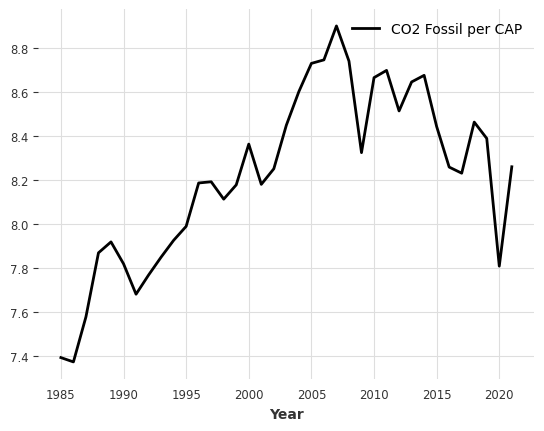

In [ ]:
series_low.plot()

In [ ]:
import numpy as np
logged_low = (series_low).map(lambda x: np.log(x))

logged_middle = (series_middle).map(lambda x: np.log(x))

logged_high = (series_high).map(lambda x: np.log(x))

In [ ]:
#scale the data
from darts.dataprocessing.transformers.scaler import Scaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
ts_transformer = Scaler(scaler)
scaled_ts = ts_transformer.fit_transform(logged_low)

ts_transformer_costarica = Scaler(scaler)
scaled_ts_costarica = ts_transformer_costarica.fit_transform(logged_middle)

ts_transformer_denmark = Scaler(scaler)
scaled_ts_denmark = ts_transformer_denmark.fit_transform(logged_high)

In [ ]:
from darts.models import ExponentialSmoothing
from darts.utils.utils import ModelMode, SeasonalityMode

In [ ]:
model = ExponentialSmoothing(seasonal=SeasonalityMode.NONE)
model.fit(series_low)

model_costarica = ExponentialSmoothing(seasonal=SeasonalityMode.NONE)
model_costarica.fit(series_middle)

model_denmark = ExponentialSmoothing(seasonal=SeasonalityMode.NONE)
model_denmark.fit(series_high)

ExponentialSmoothing(trend=ModelMode.ADDITIVE, damped=False, seasonal=SeasonalityMode.NONE, seasonal_periods=None, random_state=0, kwargs=None)

In [ ]:
exp_forecast_low = model.predict(5)

exp_forecast_middle = model_costarica.predict(5)

exp_forecast_high = model_denmark.predict(5)

<Axes: xlabel='Year'>

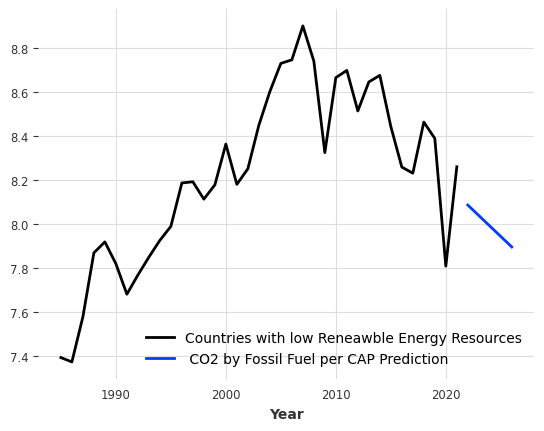

In [ ]:
series_low.plot(label="Countries with low Reneawble Energy Resources")

exp_forecast_low.plot(label =" CO2 by Fossil Fuel per CAP Prediction")



<Axes: xlabel='Year'>

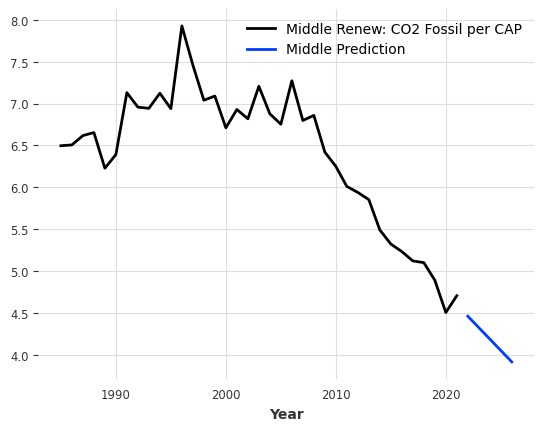

In [ ]:
series_middle.plot(label="Middle Renew: CO2 Fossil per CAP")

exp_forecast_middle.plot(label ="Middle Prediction")

<Axes: xlabel='Year'>

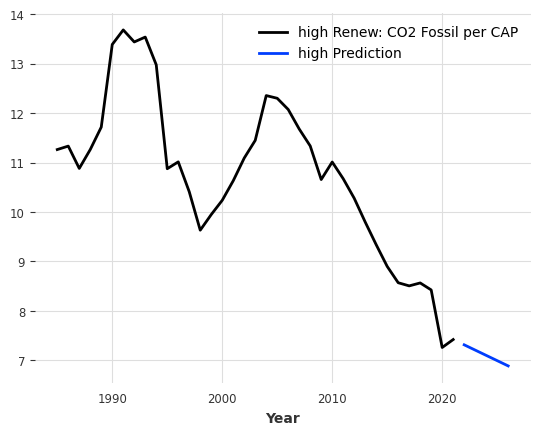

In [ ]:
series_high.plot(label="high Renew: CO2 Fossil per CAP")

exp_forecast_high.plot(label ="high Prediction")

Text(0, 0.5, 'CO2 of Fossil Fuel / CAP')

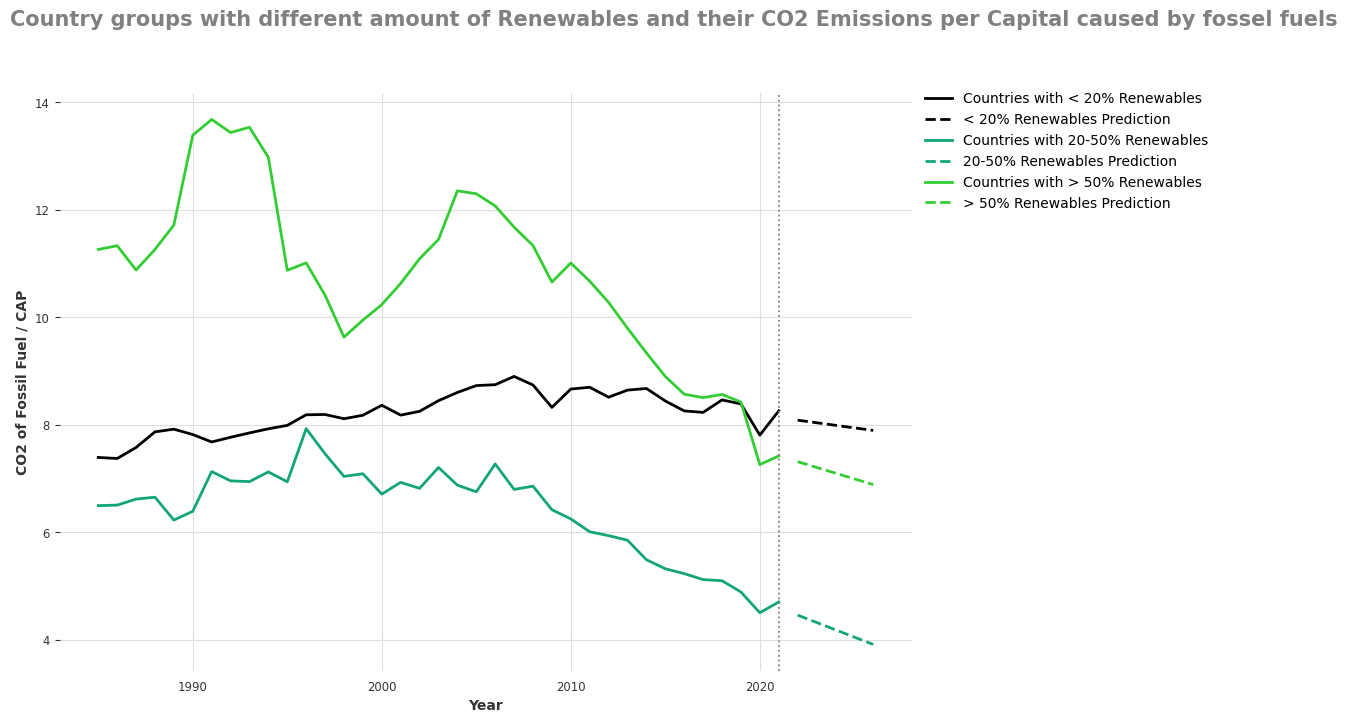

In [ ]:
fig, ax = plt.subplots(figsize = (11, 7.5))

series_low.plot(label="Countries with < 20% Renewables",color="black")
exp_forecast_low.plot(label ="< 20% Renewables Prediction", ls="dashed", color="black")
series_middle.plot(label="Countries with 20-50% Renewables",color="#11A579")
exp_forecast_middle.plot(label ="20-50% Renewables Prediction", ls="dashed", color="#11A579")
series_high.plot(label="Countries with > 50% Renewables", color="limegreen")
exp_forecast_high.plot(label ="> 50% Renewables Prediction",ls="dashed", color="limegreen")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.9))

ax.axvline(2021, color="grey", ls="dotted")

fig.text(
    0.08,
    0.97,
    "Country groups with different amount of Renewables and their CO2 Emissions per Capital caused by fossel fuels ",
    color="grey",
    fontsize=15,
    weight="bold")

ax.set_ylabel("CO2 of Fossil Fuel / CAP")



## Predict with Prophet

In [ ]:
!pip install prophet

In [ ]:
from prophet import Prophet

In [ ]:
df_low_renew["Year"] = pd.to_datetime(df_low_renew["Year"], format="%Y")
df_middle_renew["Year"] = pd.to_datetime(df_middle_renew["Year"], format="%Y")
df_high_renew["Year"] = pd.to_datetime(df_high_renew["Year"], format="%Y")

In [ ]:
model_low = Prophet()
model_middle = Prophet()
model_high = Prophet()

model_low.fit(df_low_renew.rename(columns={"Year":"ds","CO2 Fossil per CAP":"y"}))
model_middle.fit(df_middle_renew.rename(columns={"Year":"ds","CO2 Fossil per CAP":"y"}))
model_high.fit(df_high_renew.rename(columns={"Year":"ds","CO2 Fossil per CAP":"y"}))

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptt_d3u7k/qdrnmn_i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptt_d3u7k/4dczo7zt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28516', 'data', 'file=/tmp/tmptt_d3u7k/qdrnmn_i.json', 'init=/tmp/tmptt_d3u7k/4dczo7zt.json', 'output', 'file=/tmp/tmptt_d3u7k/prophet_modelq_weky0v/prophet_model-20240328094602.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
09:46:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:46:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonali

In [ ]:
future_low = model_low.make_future_dataframe(periods=10, freq="y")

future_middle = model_middle.make_future_dataframe(periods=10, freq="y")

future_high = model_high.make_future_dataframe(periods=10, freq="y")



In [ ]:
forecast_low = model_low.predict(future_low)
forecast_middle = model_middle.predict(future_middle)
forecast_high = model_high.predict(future_high)

forecast_low[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()



,ds,yhat,yhat_lower,yhat_upper
42,2026-12-31,7.677167,7.483195,7.872142
43,2027-12-31,7.482567,7.288271,7.681227
44,2028-12-31,7.821850,7.620260,8.018906
45,2029-12-31,7.689454,7.491577,7.889974
46,2030-12-31,7.525855,7.313371,7.732406


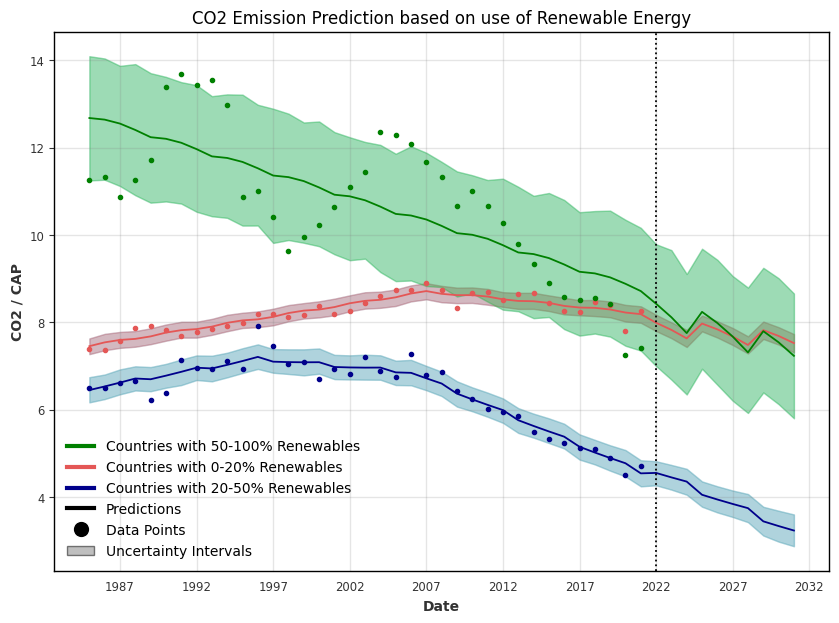

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.offsetbox import AnchoredText

custom_lines = [Line2D([0], [0], color="green", lw=3, label='Countries with 50-100% Renewables'),
                Line2D([0], [0], color="#E45756", lw=3, label='Countries with 0-20% Renewables'),
                Line2D([0], [0], color="darkblue", lw=3, label='Countries with 20-50% Renewables'),
                ]

legend_elements = [Line2D([0], [0], color='black', lw=3, label='Predictions'),
                   Line2D([0], [0], marker='o', color='white', label='Data Points',
                          markerfacecolor='black', markersize=12),
                   Patch(facecolor='grey',alpha=0.5, edgecolor='black',
                         label='Uncertainty Intervals')]

fig, ax = plt.subplots(figsize=(10, 7))

ax.legend(handles=custom_lines +legend_elements, loc='lower left')


model_low.plot(forecast_low, ax=ax)
model_middle.plot(forecast_middle, ax=ax)
model_high.plot(forecast_high, ax=ax)

ax.set_title('CO2 Emission Prediction based on use of Renewable Energy')
ax.set_xlabel('Date')
ax.set_ylabel('CO2 / CAP')
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

threshold_date = pd.to_datetime("2022-01-01")
ax.axvline(threshold_date, color="black", ls="dotted")


# Colors of the lines
lines = ax.get_lines()
lines[0].set_color('#E45756')  # Low Renew
lines[1].set_color('#E45756')  # Low Renew
lines[2].set_color('darkblue')  # Mid Renew
lines[3].set_color('darkblue')  # Mid Renew
lines[4].set_color('green')  # High Renew
lines[5].set_color('green')  # High Renew

# Uncertainty interval display range
forecast_low_only = forecast_low[forecast_low['ds'] >= '1985-01-01']
forecast_middle_only = forecast_middle[forecast_middle['ds'] >= '1985-01-01']
forecast_high_only = forecast_high[forecast_high['ds'] >= '1985-01-01']

# Uncertainty interval colors and design
ax.fill_between(forecast_low_only['ds'], forecast_low_only['yhat_lower'], forecast_low_only['yhat_upper'], color='#E45756', alpha=0.3)
ax.fill_between(forecast_middle_only['ds'], forecast_middle_only['yhat_lower'], forecast_middle_only['yhat_upper'],color='#6CB3B5', alpha=0.3)
ax.fill_between(forecast_high_only['ds'], forecast_high_only['yhat_lower'], forecast_high_only['yhat_upper'], color='limegreen', alpha=0.3)


plt.show()